In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend.plotting import plot_decision_regions

In [81]:
dataset = pd.read_csv('../Social_Network_Ads.csv')
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [82]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [83]:
x = dataset.iloc[:, 2:-1]
y = dataset['Purchased']

In [84]:
ss = StandardScaler()
ss.fit(x)
x = pd.DataFrame(ss.transform(x), columns=dataset.columns[2:-1])

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [86]:
dtc = DecisionTreeClassifier(max_depth=2) # setting max_depth first is pre prunning
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [87]:
dtc.score(x_test, y_test) * 100

91.25

In [88]:
dtc.score(x_train, y_train) * 100 # if accuracy over train is very high than on test data then your model is over fitted.

91.875

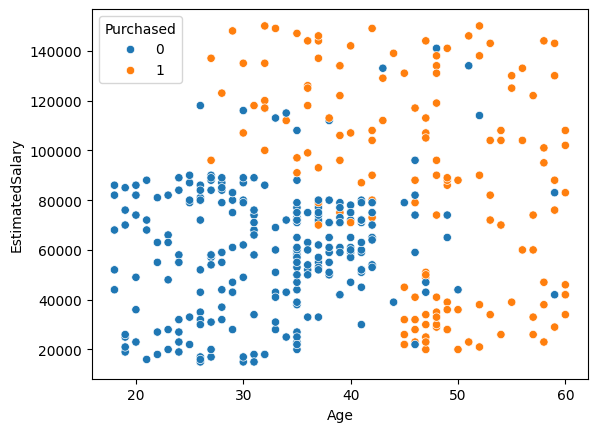

In [89]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=dataset, hue='Purchased')

plt.show()

c:\Users\Prati\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


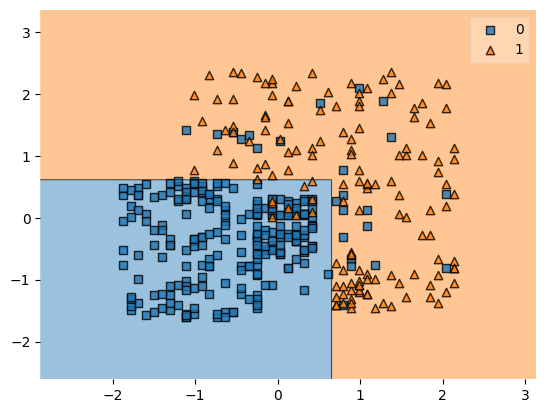

In [90]:
plot_decision_regions(X=x.to_numpy(), y=y.to_numpy(), clf=dtc)
plt.show()

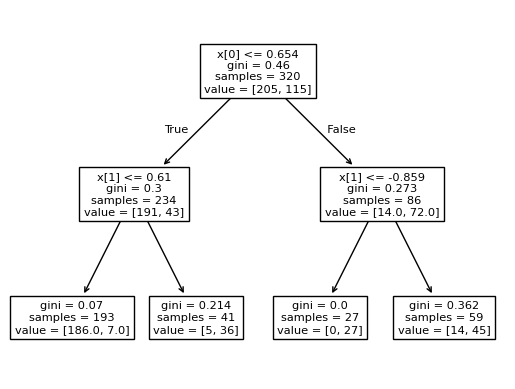

In [91]:
# plt.figure(figsize=(50, 50))
plot_tree(dtc)
plt.show()

In [92]:
for i in range(1, 20): # this is post prunning means chossing the best on trying a range of max_depth
  dt = DecisionTreeClassifier(max_depth=i)
  dt.fit(x_train, y_train)
  print(dt.score(x_test, y_test) * 100, dt.score(x_train, y_train) * 100, i)

90.0 82.1875 1
91.25 91.875 2
91.25 91.875 3
91.25 93.125 4
90.0 93.4375 5
86.25 95.0 6
85.0 96.875 7
85.0 97.5 8
85.0 98.125 9
85.0 98.4375 10
83.75 99.0625 11
83.75 99.375 12
83.75 99.6875 13
83.75 99.6875 14
83.75 99.6875 15
83.75 99.6875 16
83.75 99.6875 17
83.75 99.6875 18
83.75 99.6875 19
